
# Bike Sharing Assignment : Linear Regression


### Submitted by Zaid Ahmed  

### Problem Statement 
BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



## 1. Data Understanding

In [1]:
#Importing all required libraries that includes Numpy , Pandas , Data Visualization libraries and libraries required for Model Building and evaluation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To begin with our analysis we will first import the required dataset namely "Day" that contains all customer information into a pandas dataframe
bike_sharing = pd.read_csv("day.csv")

In [3]:
#Lets check the type of columns present in the dataset by listing first 5 rows
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#We need to look at few more dataset characteristics that will help in analyzing data
bike_sharing.shape

(730, 16)

In [5]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Missing Values check on the given Dataset

In [6]:
print(bike_sharing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


### From the above entries we can conclude that there are no null values or missing values in the given dataset

##### In our dataset we come across columns that have numberic values(1, 2, 3 ,...) that have separate labels assigned in data dictionary. 
##### We need to convert them to known values for better visualization

We will start with season column and assign the values as follows

### 1 > spring
### 2 > summer
### 3 > fall
### 4 > winter


In [7]:
bike_sharing.loc[(bike_sharing['season'] == 1) , 'season'] = 'spring'
bike_sharing.loc[(bike_sharing['season'] == 2) , 'season'] = 'summer'
bike_sharing.loc[(bike_sharing['season'] == 3) , 'season'] = 'fall'
bike_sharing.loc[(bike_sharing['season'] == 4) , 'season'] = 'winter'

In [8]:
bike_sharing.head(n=10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [9]:
bike_sharing['season'].astype('category').value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [10]:
    # checking values for 2018 and 2019
bike_sharing['yr'].astype('category').value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [11]:
# We will now work with months column to convert numerical values to appropriate string

In [12]:
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})


bike_sharing[['mnth']] = bike_sharing[['mnth']].apply(object_map)


In [13]:
bike_sharing['mnth'].astype('category').value_counts()

mnth
Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: count, dtype: int64

In [14]:
bike_sharing['holiday'].astype('category').value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [15]:
# Next in line is weekdays column
def str_map(x):
    return x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

bike_sharing[['weekday']] = bike_sharing[['weekday']].apply(str_map)

In [16]:
bike_sharing['weekday'].astype('category').value_counts()

weekday
Mon      105
Tues     105
Wed      105
Sat      104
Sun      104
Thurs    104
Fri      103
Name: count, dtype: int64

In [17]:
bike_sharing['workingday'].astype('category').value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [18]:
#We will assign weathersit values as follows

bike_sharing.loc[(bike_sharing['weathersit'] == 1) , 'weathersit'] = 'F'
bike_sharing.loc[(bike_sharing['weathersit'] == 2) , 'weathersit'] = 'B'
bike_sharing.loc[(bike_sharing['weathersit'] == 3) , 'weathersit'] = 'C'
bike_sharing.loc[(bike_sharing['weathersit'] == 4) , 'weathersit'] = 'D'

In [19]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [20]:
bike_sharing['weathersit'].unique()

array(['B', 'F', 'C'], dtype=object)

## 1. Data Visualization 
We will start with Univariate analysis on some of the important categories and our target category cnt

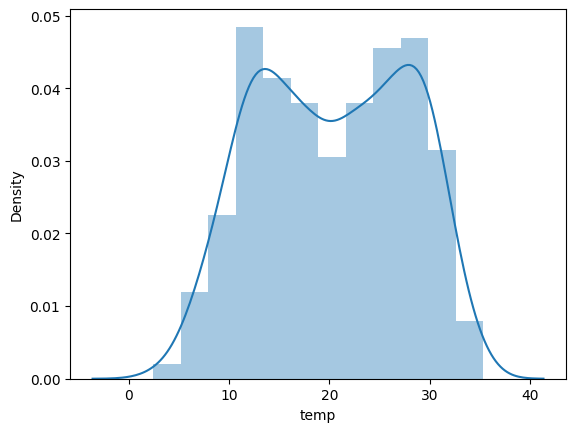

In [21]:
sns.distplot(bike_sharing['temp'])
plt.show()

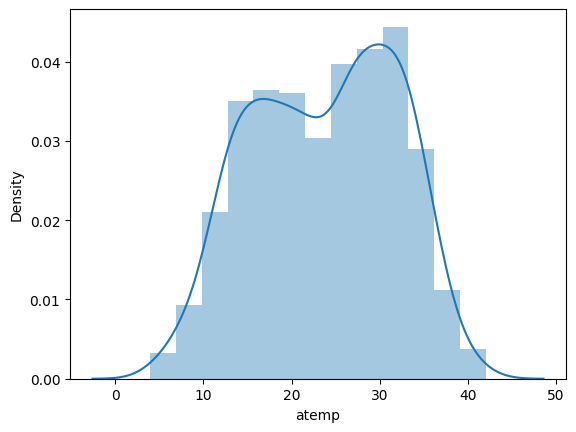

In [22]:
sns.distplot(bike_sharing['atemp'])
plt.show()

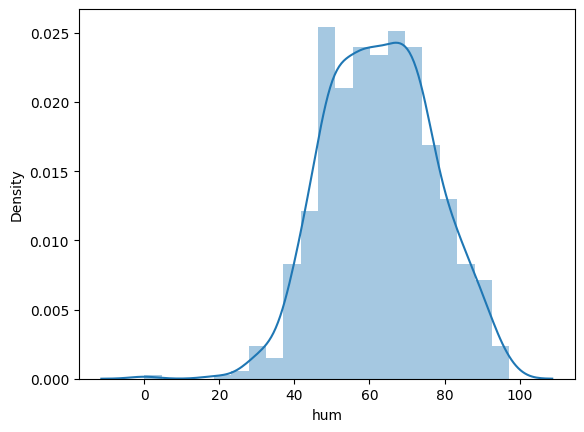

In [23]:
sns.distplot(bike_sharing['hum'])
plt.show()

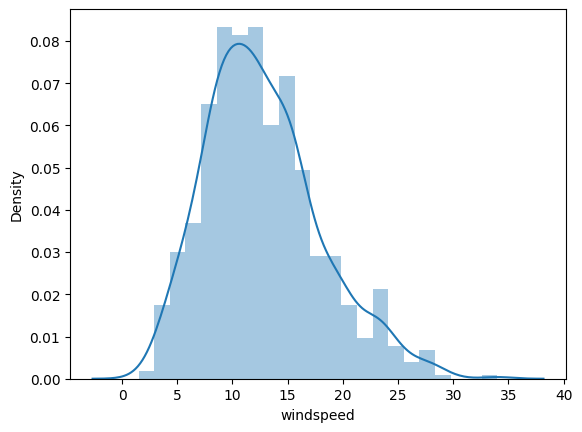

In [24]:
sns.distplot(bike_sharing['windspeed'])
plt.show()

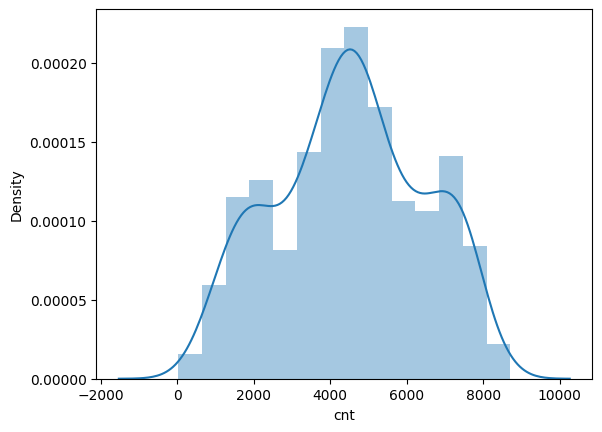

In [25]:
sns.distplot(bike_sharing['cnt'])
plt.show()

In [26]:
#converting date format
bike_sharing['dteday']=pd.to_datetime(bike_sharing['dteday'], dayfirst=True)

In [31]:
bike_sharing_categorical = bike_sharing.select_dtypes(exclude=['float64','datetime64','int64'])
print(bike_sharing_categorical.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [32]:
bike_sharing_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,Tues,B
2,spring,Jan,Wed,F
3,spring,Jan,Thurs,F
4,spring,Jan,Fri,F
...,...,...,...,...
725,spring,Dec,Sat,B
726,spring,Dec,Sun,B
727,spring,Dec,Mon,B
728,spring,Dec,Tues,F


#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

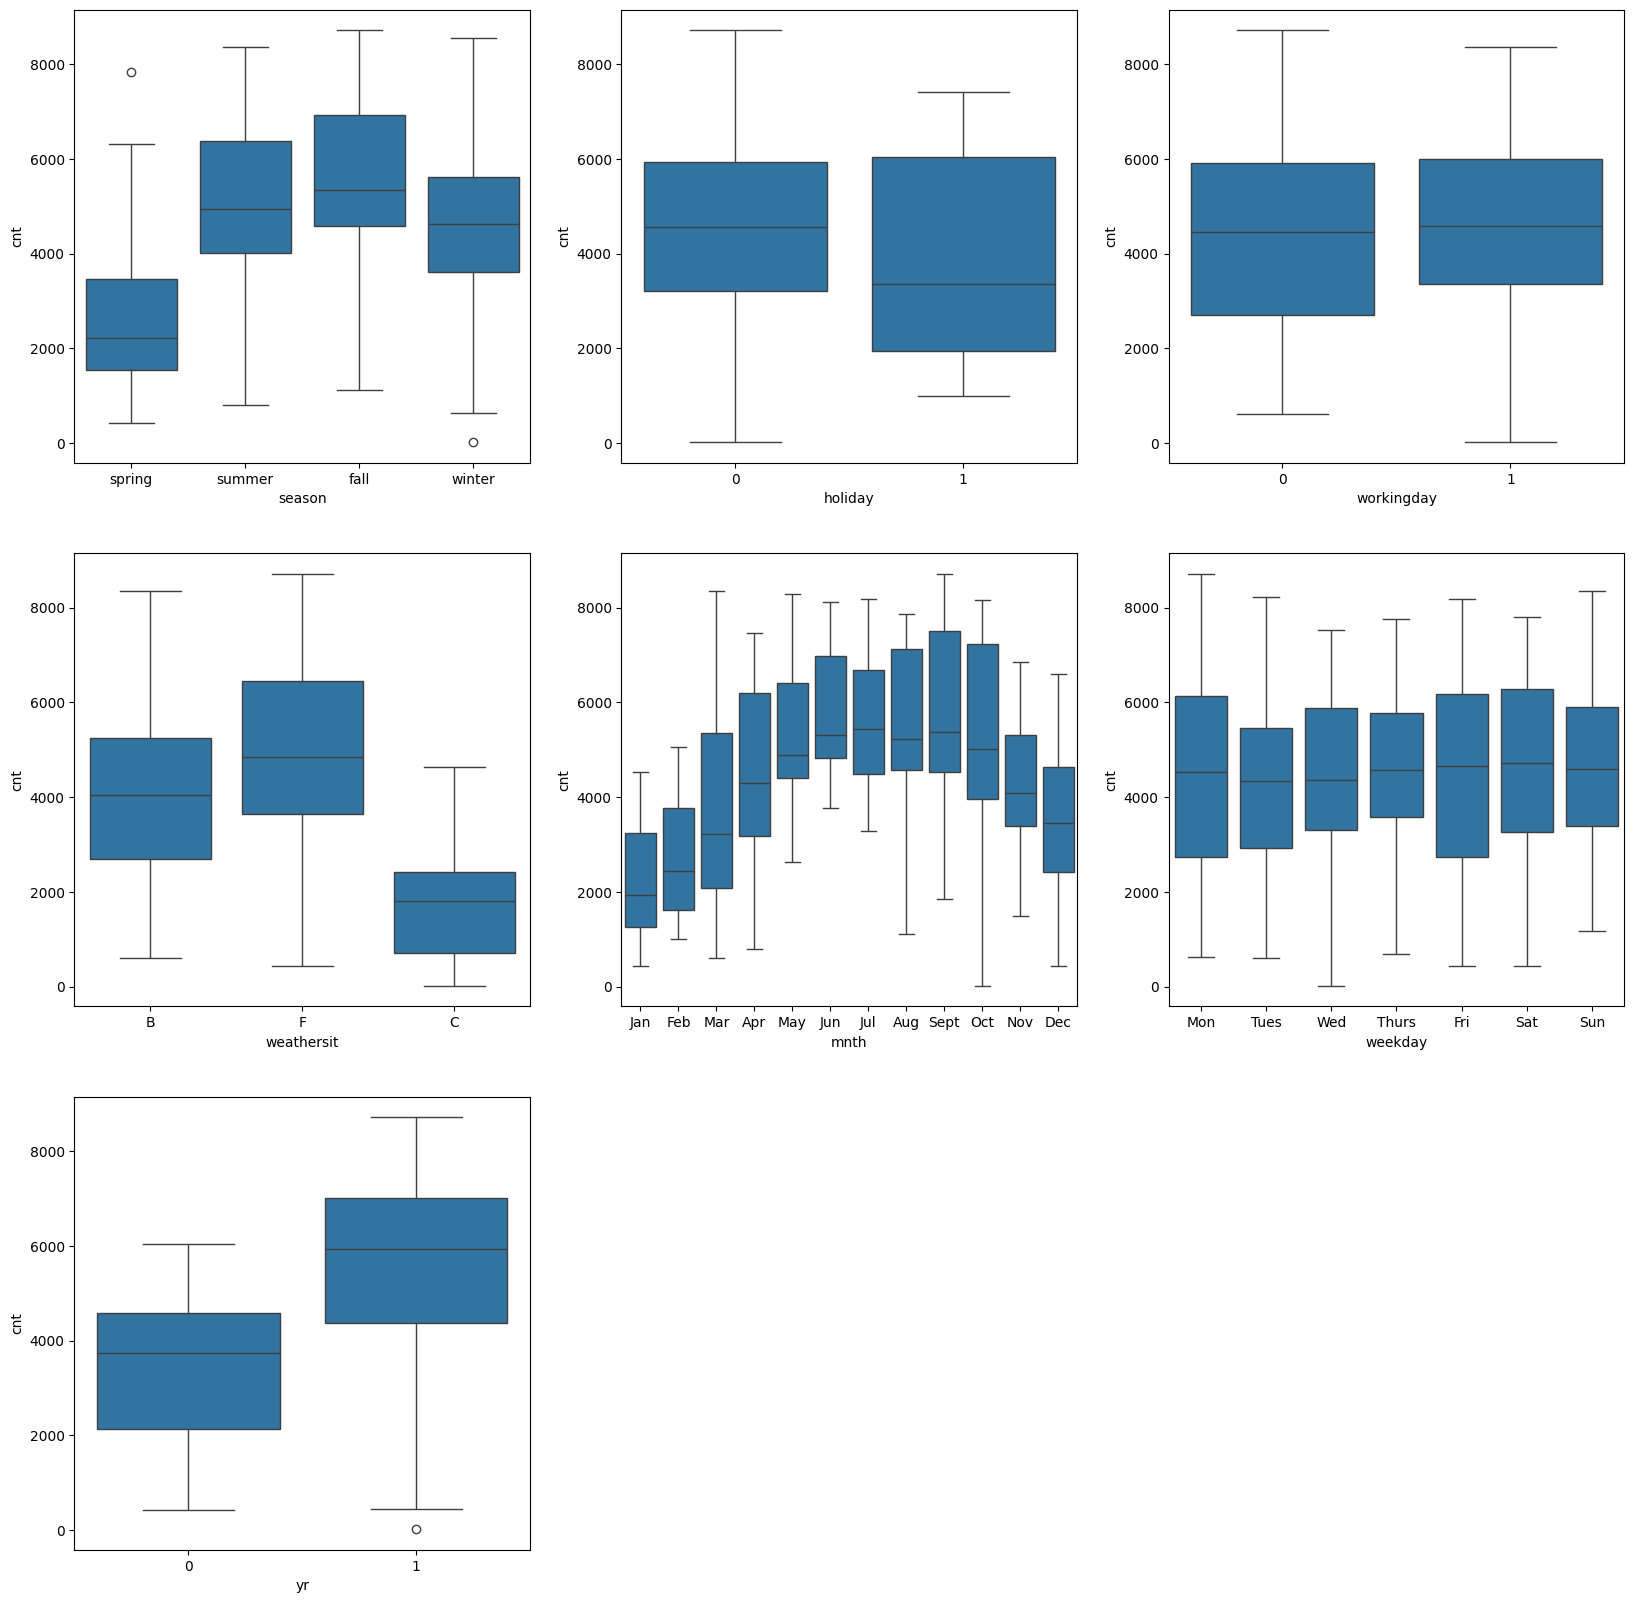

In [35]:
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing)
plt.show()
#plt.subplot(3,3,8)
#sns.boxplot(x = 'date', y = 'cnt', data = bike_sharing)

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [37]:
IntVariableList = ["casual","registered","cnt"]

for var in IntVariableList:
    bike_sharing[var] = bike_sharing[var].astype("float")

In [39]:
bike_sharing_numeric = bike_sharing.select_dtypes(include=['float64'])
bike_sharing_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


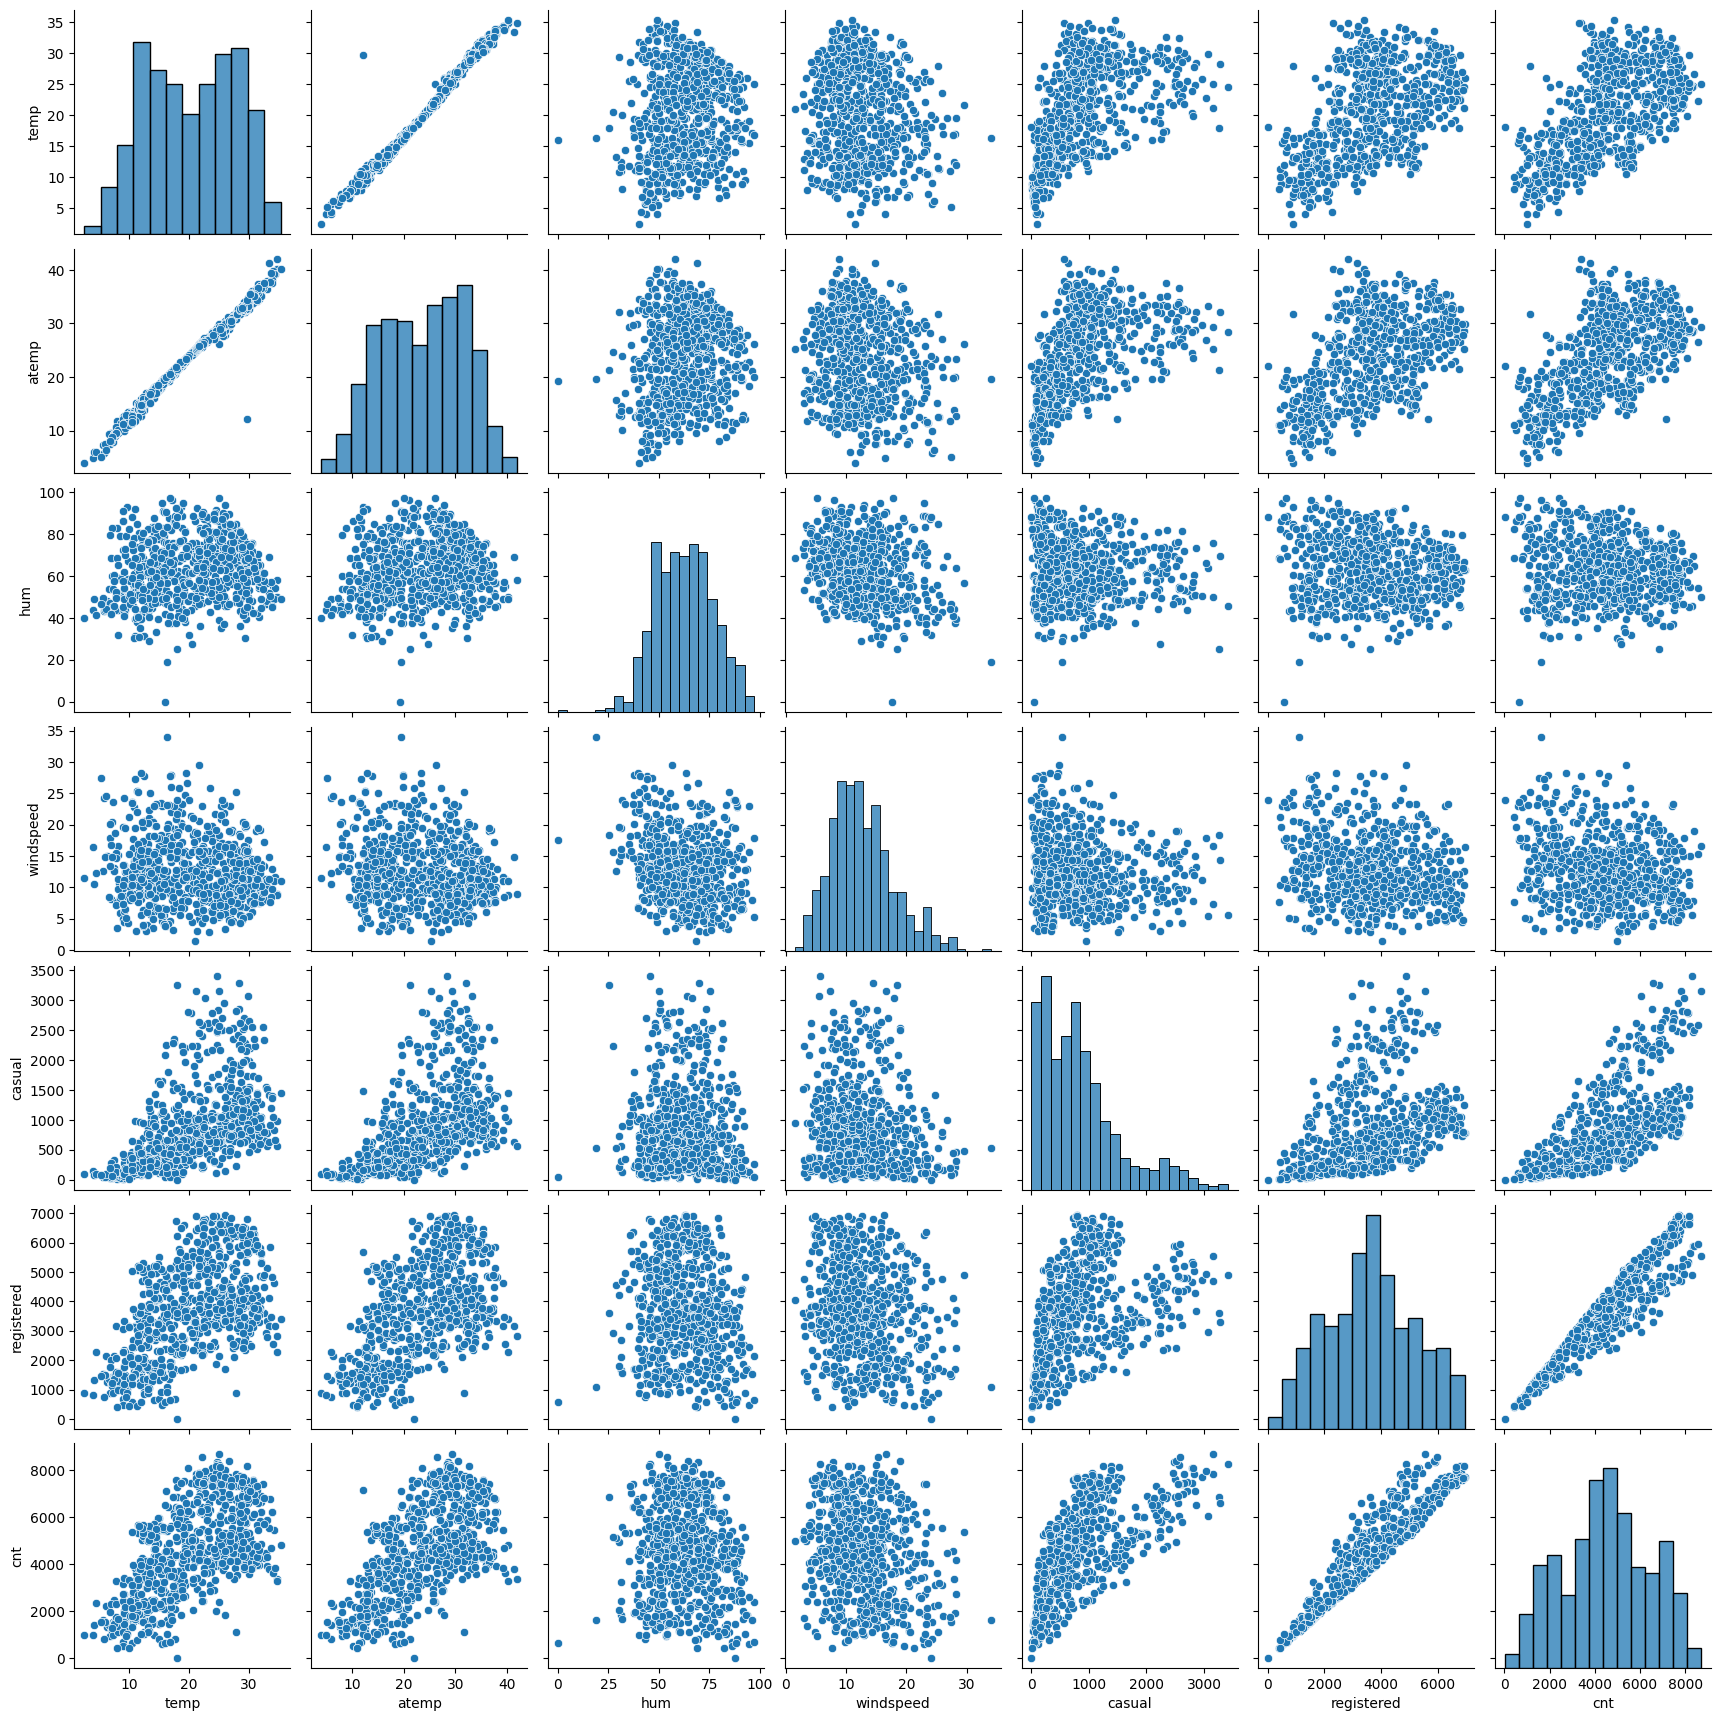

In [40]:
sns.pairplot(bike_sharing_numeric)
plt.show()

We can better plot correlation matrix between variables to know the exact values of correlation between them. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [42]:
# Correlation matrix
cor = bike_sharing_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

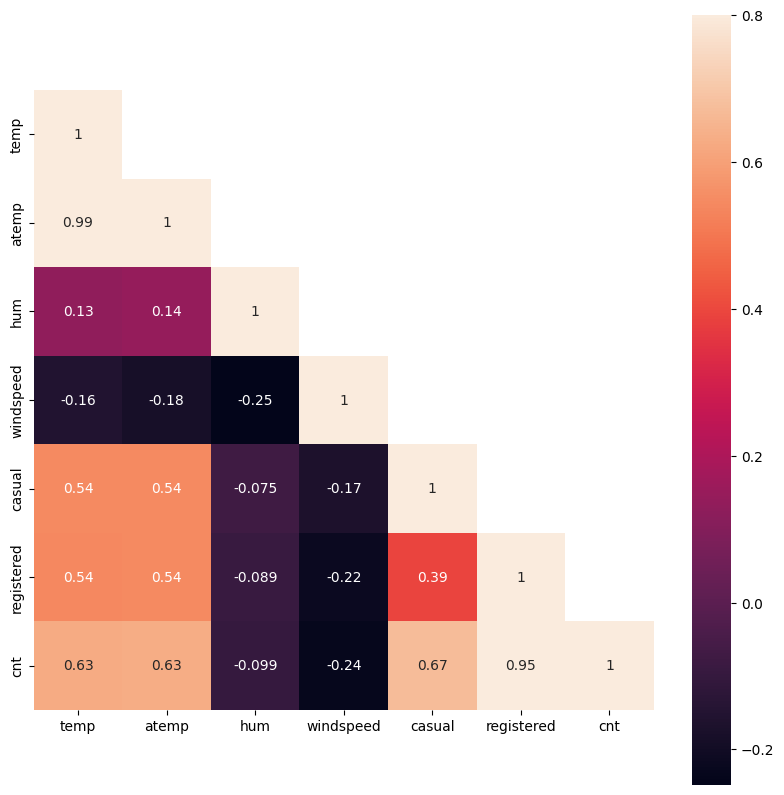

In [43]:
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

The heatmap shows some useful insights:

Correlation of Count('cnt') with independent variables:
- Count('cnt') is highly (positively) correlated with 'casual' and 'registered' and further it is high with 'atemp'. We can clearly understand the high positive correlation of count with 'registered' and 'casual' as both of them together add up to represent count.

- Count is negatively correlated to 'windspeed' (-0.24 approximately). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.

Correlation among independent variables:
- Some of the independent variables are highly correlated (look at the top-left part of matrix): atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.


Thus, while building the model, we'll have to pay attention to multicollinearity.

In [45]:
#removing atemp as it is highly correlated with temp
bike_sharing.drop('atemp',axis=1,inplace=True)    

## 3. Data Preparation 
Let's now prepare the data and build the model.
Note that we had not included 'yr', 'mnth', 'holiday', 'weekday' and 'workingday' as object variables in the initial data exploration steps so as to avoid too many dummy variables creation. They have binary values: 0s and 1s in them which have specific meanings associated with them.



In [47]:
# Subset all categorical variables
bike_sharing_categorical=bike_sharing.select_dtypes(include=['object'])

In [48]:
bike_sharing_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   mnth        730 non-null    object
 2   weekday     730 non-null    object
 3   weathersit  730 non-null    object
dtypes: object(4)
memory usage: 22.9+ KB


#### Dummy Variables
The variable `season`,`mnth`,`weekday` and `weathersit` have different levels. We need to convert these levels into integers. 

For this, we will use something called `dummy variables`.

In [50]:
# Convert into dummies
bike_sharing_dummies = pd.get_dummies(bike_sharing_categorical, drop_first=True)
bike_sharing_dummies = bike_sharing_dummies.astype(int)
bike_sharing_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_C,weathersit_F
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
# Drop categorical variable columns
bike_sharing = bike_sharing.drop(list(bike_sharing_categorical.columns), axis=1)

In [53]:
# Concatenate dummy variables with the original dataframe
bike_sharing = pd.concat([bike_sharing, bike_sharing_dummies], axis=1)

In [54]:
# Let's check the first few rows
bike_sharing.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_C,weathersit_F
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,1,0,0,0,0,0,0,0
1,2,2018-01-02,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,0,0,1,0,0,0
2,3,2018-01-03,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,0,0,0,0,0,1,0,1
3,4,2018-01-04,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,1,0,0,0,1
4,5,2018-01-05,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
bike_sharing=bike_sharing.drop(['instant','dteday'], axis = 1, inplace = False)
bike_sharing.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_C,weathersit_F
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,0,0,0,0,1,0,1
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,0,0,1


## 4. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [56]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing, train_size=0.75, test_size=0.25, random_state=50)

In [57]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_C,weathersit_F
98,0,0,0,14.042500,87.7500,8.916561,879.0,1576.0,2455.0,0,...,0,0,1,0,0,0,0,0,0,0
396,1,0,1,19.235847,50.7917,12.667489,304.0,4275.0,4579.0,1,...,0,0,0,0,0,0,0,0,0,1
175,0,0,0,28.495000,48.3333,14.041257,1782.0,3420.0,5202.0,0,...,0,0,1,0,0,0,0,0,0,1
454,1,0,0,17.390847,73.8333,16.791339,2301.0,3934.0,6235.0,0,...,0,0,1,0,0,0,0,0,0,0
234,0,0,1,26.274153,45.5417,9.833121,1281.0,4614.0,5895.0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0,0,1,21.012500,86.3333,12.041575,692.0,3413.0,4105.0,0,...,0,0,0,0,1,0,0,0,0,0
289,0,0,1,21.900847,57.9583,11.750393,713.0,3857.0,4570.0,0,...,1,0,0,0,0,0,0,1,0,1
109,0,0,1,24.395000,61.4167,16.208975,613.0,3331.0,3944.0,0,...,0,0,0,0,0,0,0,0,0,1
480,1,0,1,20.431653,75.6667,11.833875,475.0,4551.0,5026.0,0,...,0,0,0,1,0,0,0,0,0,0


### Scaling
Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

Let's scale all these columns using MinMaxScaler

In [58]:
from sklearn.preprocessing import MinMaxScaler 

In [59]:
scaler = MinMaxScaler()

In [60]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [61]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_C,weathersit_F
98,0,0,0,0.353092,0.904250,0.189757,0.267297,0.225802,0.279913,0,...,0,0,1,0,0,0,0,0,0,0
396,1,0,1,0.510926,0.523401,0.310919,0.092045,0.617472,0.524275,1,...,0,0,0,0,0,0,0,0,0,1
175,0,0,0,0.792325,0.498067,0.355294,0.542518,0.493397,0.595950,0,...,0,0,1,0,0,0,0,0,0,1
454,1,0,0,0.454854,0.760841,0.444127,0.700701,0.567987,0.714795,0,...,0,0,1,0,0,0,0,0,0,0
234,0,0,1,0.724830,0.469300,0.219363,0.389820,0.666667,0.675679,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0,0,1,0.564921,0.889652,0.290701,0.210302,0.492381,0.469742,0,...,0,0,0,0,1,0,0,0,0,0
289,0,0,1,0.591919,0.597251,0.281295,0.216702,0.556813,0.523240,0,...,1,0,0,0,0,0,0,1,0,1
109,0,0,1,0.667720,0.632890,0.425316,0.186224,0.480482,0.451220,0,...,0,0,0,0,0,0,0,0,0,1
480,1,0,1,0.547268,0.779734,0.283992,0.144163,0.657524,0.575702,0,...,0,0,0,1,0,0,0,0,0,0


In [62]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_C,weathersit_F
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.00000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.486289,0.025594,0.700183,0.539238,0.643969,0.317546,0.252013,0.524538,0.510981,0.248629,...,0.084095,0.063985,0.13894,0.144424,0.140768,0.153565,0.135283,0.148080,0.029250,0.628885
std,0.500269,0.158066,0.458597,0.225899,0.147268,0.167984,0.206350,0.227409,0.223525,0.432614,...,0.277784,0.244951,0.34620,0.351841,0.348100,0.360861,0.342339,0.355505,0.168662,0.483545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333364,0.528982,0.197183,0.093721,0.355899,0.352163,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.538962,0.645771,0.294759,0.211216,0.527935,0.519673,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.743521,0.750751,0.406464,0.321244,0.685314,0.676254,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


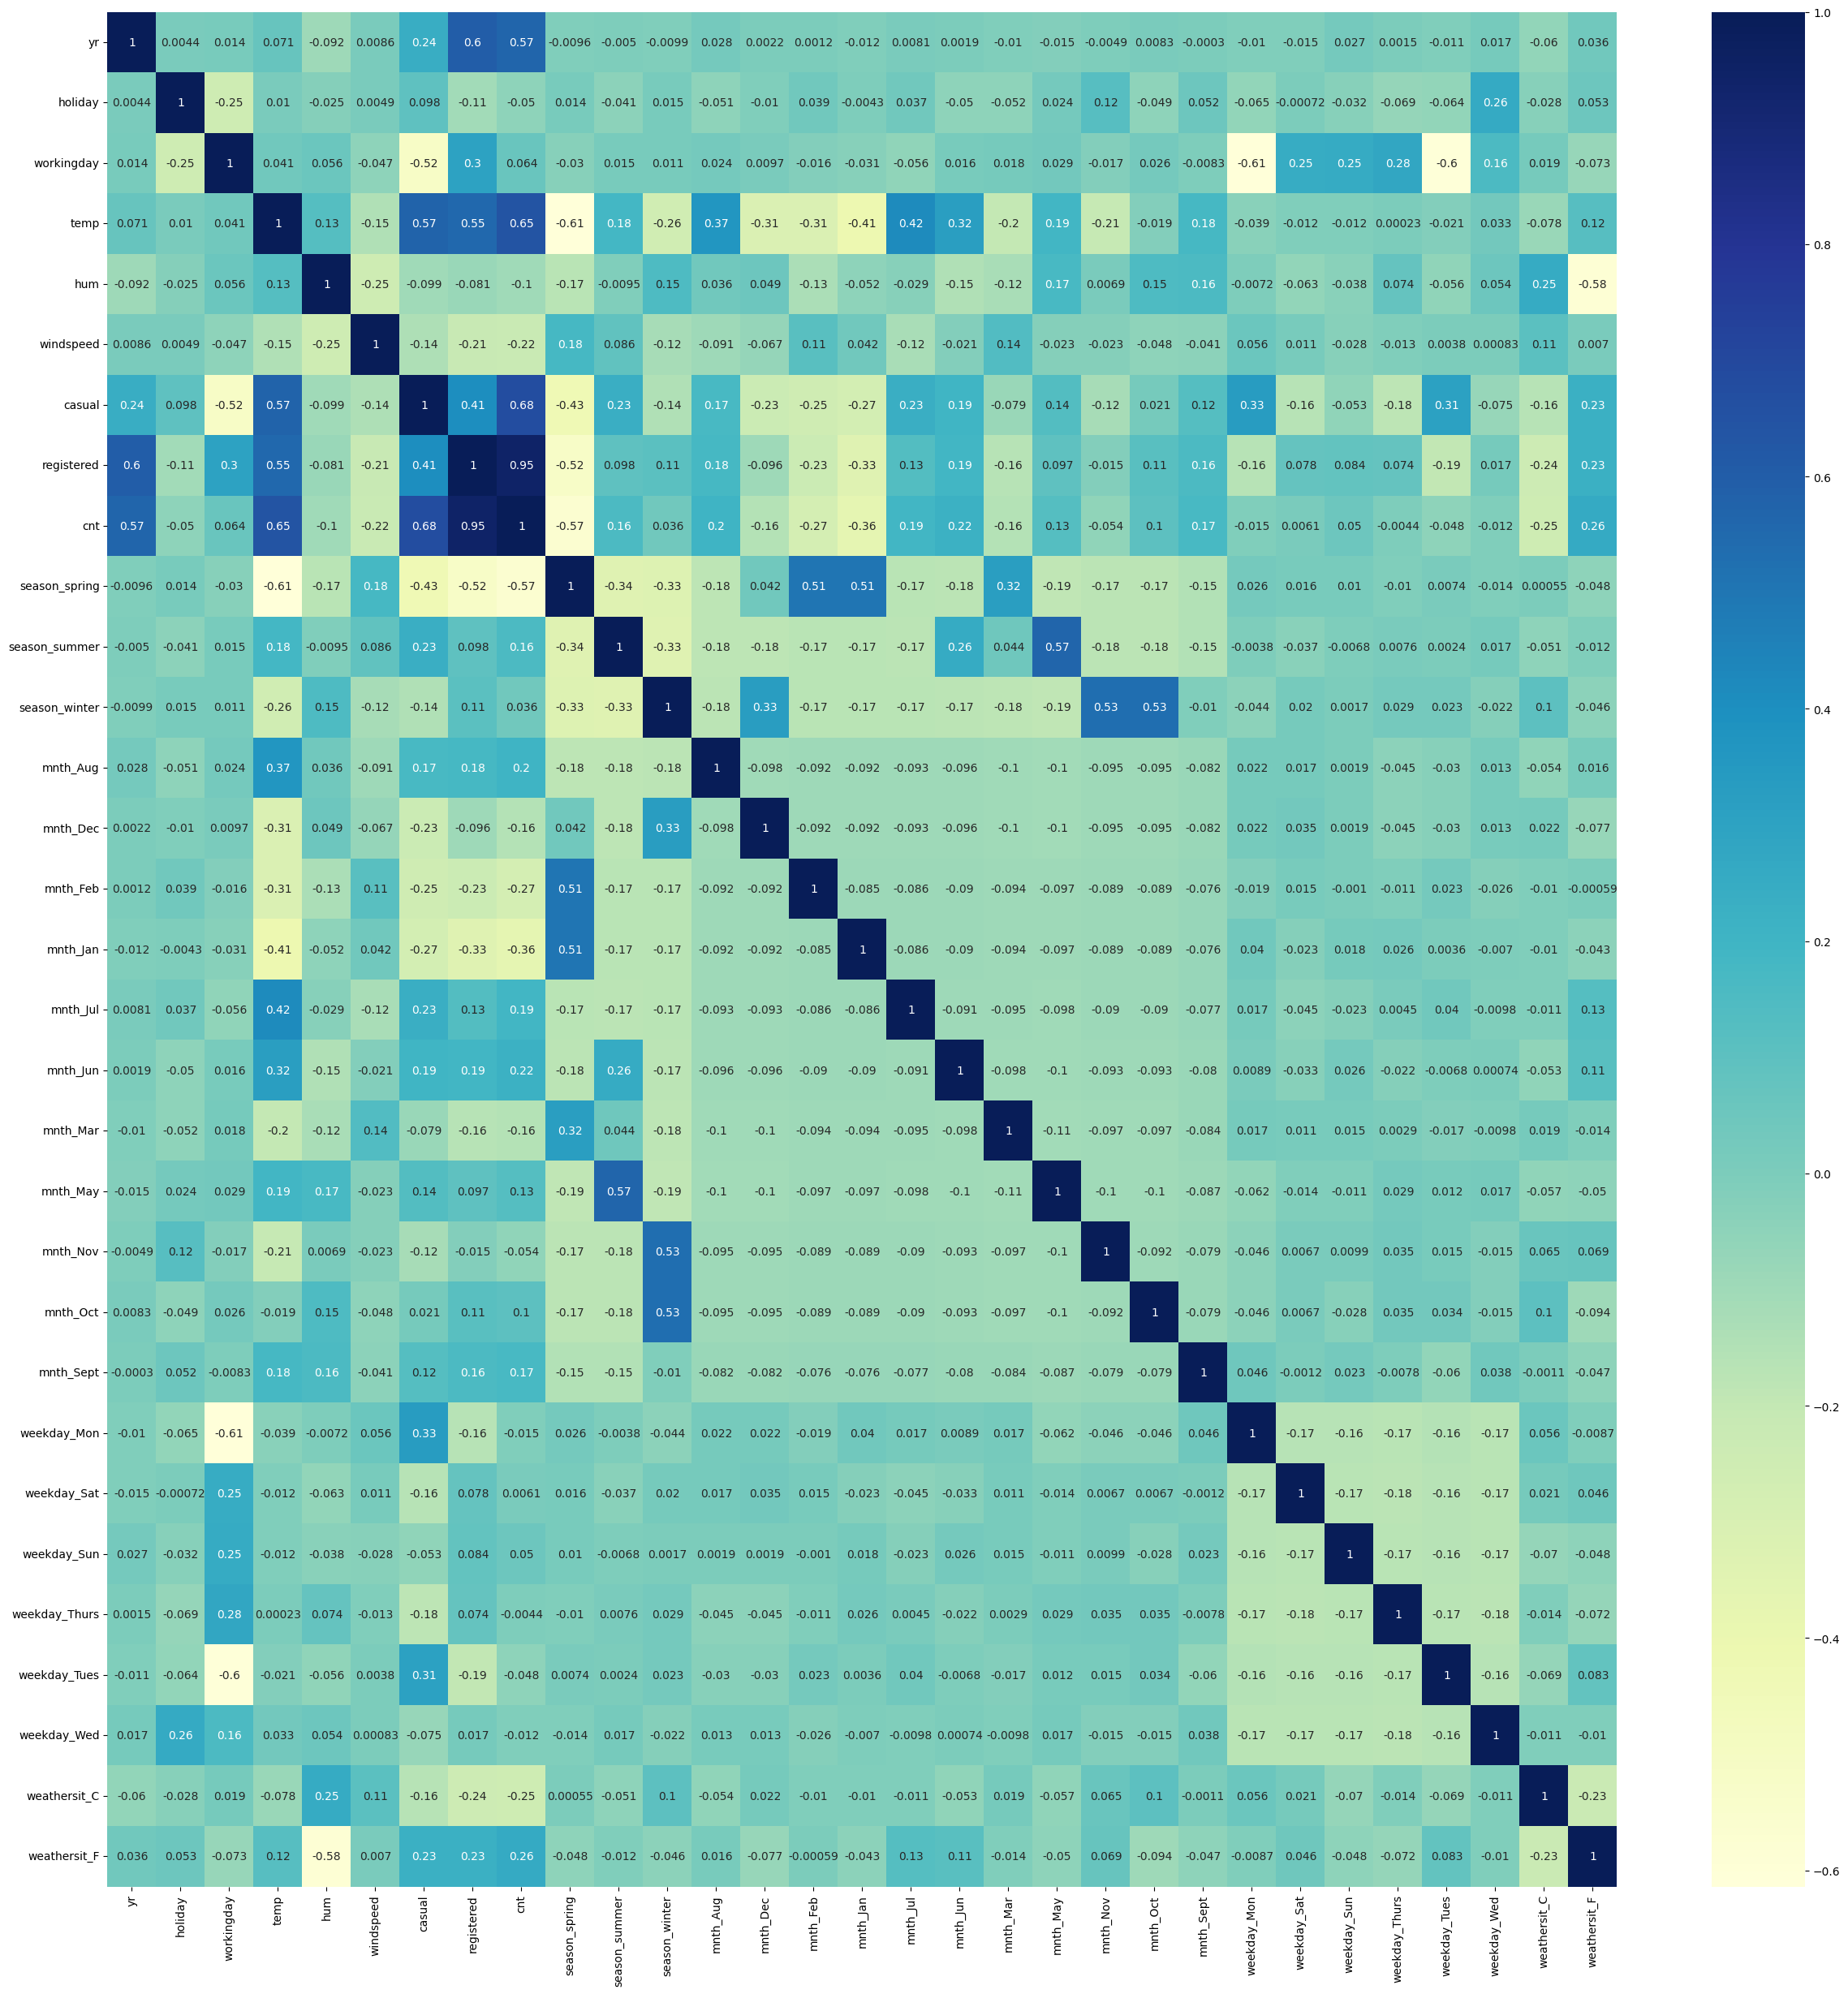

In [63]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `temp` seems to the correlated to `cnt` the most, after 'casual' and 'registered'. Let's see a pairplot for `temp` vs `cnt`.

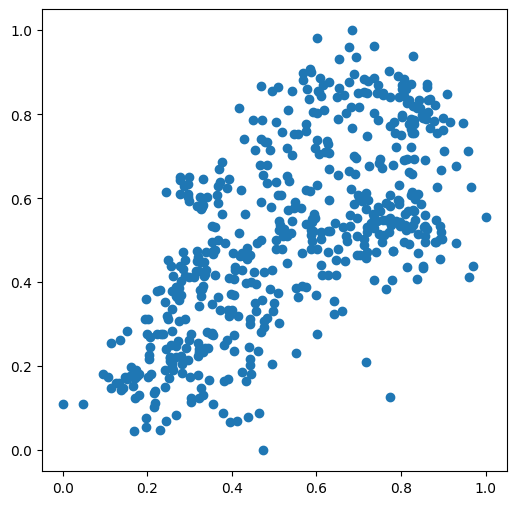

In [64]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [65]:
# Dropping 'casual' and 'registered' as together they add up to cnt
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1) 

In [66]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_C,weathersit_F
98,0,0,0,0.353092,0.904250,0.189757,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
396,1,0,1,0.510926,0.523401,0.310919,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
175,0,0,0,0.792325,0.498067,0.355294,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
454,1,0,0,0.454854,0.760841,0.444127,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
234,0,0,1,0.724830,0.469300,0.219363,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [67]:
# This is done to convert all the features into array before fitting the model and avoid any error popping up
np.asarray(df_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

### Building the first model with all the features

Let's now build our first model with all the features.

In [68]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const            0.234252
yr               0.229423
holiday          0.005139
workingday       0.085134
temp             0.435177
hum             -0.198344
windspeed       -0.172037
season_spring   -0.069036
season_summer    0.026570
season_winter    0.121868
mnth_Aug         0.015600
mnth_Dec        -0.066833
mnth_Feb        -0.028261
mnth_Jan        -0.054274
mnth_Jul        -0.010219
mnth_Jun         0.019798
mnth_Mar         0.006039
mnth_May         0.032756
mnth_Nov        -0.076519
mnth_Oct        -0.007686
mnth_Sept        0.079419
weekday_Mon      0.096670
weekday_Sat      0.002355
weekday_Sun      0.010310
weekday_Thurs   -0.005930
weekday_Tues     0.047309
weekday_Wed     -0.014177
weathersit_C    -0.169111
weathersit_F     0.045173
dtype: float64

In [69]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [70]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 2.29422767e-01  4.69780587e+12  4.69780587e+12  4.63696827e-01
 -1.82161080e-01 -1.91906166e-01 -2.82498665e-02  2.86514402e-02
  2.24062921e-01  8.57407914e-03 -1.59307875e-01 -5.13528570e-02
 -8.55780355e-02 -2.66120971e-02 -1.45308178e-02 -2.07548691e-02
  4.39613915e-02 -1.88826155e-01 -1.17775433e-01  8.14669363e-02
  4.69780587e+12  2.89296064e-02  3.26912415e-02 -1.19209416e-02
  4.69780587e+12  1.86873927e-02 -1.81319285e-01  4.38352276e-02]
-4697805868050.509


In [71]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.1
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.78e-194
Time:                        13:24:00   Log-Likelihood:                 563.10
No. Observations:                 547   AIC:                            -1070.
Df Residuals:                     519   BIC:                            -949.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2343      0.037      6.317      0.000       0.161       0.307
yr                0.2294      0.008     29.547      0.000       0.214       0.245
holiday           0.0051      0.024      0.218      0.827      -0.041       0.051
workingday        0.0851      0.012      6.848      0.000       0.061       0.110
temp              0.4352      0.045      9.596      0.000       0.346       0.524
hum              -0.1983      0.038     -5.225      0.000      -0.273      -0.124
windspeed        -0.1720      0.025     -6.893      0.000      -0.221      -0.123
season_spring    -0.0690      0.029     -2.356      0.019      -0.127      -0.011
season_summer     0.0266      0.024      1.101      0.271      -0.021       0.074
season_winter     0.1219      0.029      4.259      0.000       0.066       0.178
mnth_Aug          0.0156      0.032      0.486      0.627      -0.048       0.079
mnth_Dec         -0.0668      0.033     -1.998      0.046      -0.133      -0.001
mnth_Feb         -0.0283      0.032     -0.879      0.380      -0.091       0.035
mnth_Jan         -0.0543      0.033     -1.627      0.104      -0.120       0.011
mnth_Jul         -0.0102      0.033     -0.307      0.759      -0.076       0.055
mnth_Jun          0.0198      0.024      0.826      0.409      -0.027       0.067
mnth_Mar          0.0060      0.025      0.238      0.812      -0.044       0.056
mnth_May          0.0328      0.020      1.639      0.102      -0.006       0.072
mnth_Nov         -0.0765      0.036     -2.109      0.035      -0.148      -0.005
mnth_Oct         -0.0077      0.035     -0.218      0.828      -0.077       0.062
mnth_Sept         0.0794      0.031      2.565      0.011       0.019       0.140
weekday_Mon       0.0967      0.014      6.947      0.000       0.069       0.124
weekday_Sat       0.0024      0.014      0.164      0.870      -0.026       0.031
weekday_Sun       0.0103      0.015      0.709      0.479      -0.018       0.039
weekday_Thurs    -0.0059      0.014     -0.418      0.676      -0.034       0.022
weekday_Tues      0.0473      0.014      3.429      0.001       0.020       0.074
weekday_Wed      -0.0142      0.015     -0.976      0.330      -0.043       0.014
weathersit_C     -0.1691      0.024     -6.943      0.000      -0.217      -0.121
weathersit_F      0.0452      0.010      4.339      0.000       0.025       0.066
==============================================================================
Omnibus:                      104.319   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              328.381
Skew:                          -0.888   Prob(JB):                     4.93e-72
Kurtosis:                       6.355   Cond. No.                     6.62e+15
================================================================

This model has an Adjusted R-squared value  which seems pretty good. We can reduce the number of features and exclude those which are not much relevant in explaining the target variable. 

#### Model Building Using RFE

Now, you have close to 28 features. It is obviously not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [73]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create the model
lm = LinearRegression()

# Initialize RFE with the model and the number of features to select
rfe1 = RFE(estimator=lm, n_features_to_select=15)

# Fit RFE on the training data
rfe1.fit(X_train, y_train)

# Print the boolean results and the ranking
print(rfe1.support_)           
print(rfe1.ranking_)

[ True  True  True  True  True  True  True False  True False  True False
 False  True False False False  True False  True  True False False False
  True False  True False]
[ 1  1  1  1  1  1  1  6  1 14  1  5  3  1 10 12  4  1  7  1  1 13 11  9
  1  8  1  2]


In [74]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_Jul,mnth_Nov,mnth_Sept,weekday_Mon,weekday_Tues,weathersit_C
98,1.0,0,0,0,0.353092,0.904250,0.189757,0,0,0,0,0,0,1,0,0
396,1.0,1,0,1,0.510926,0.523401,0.310919,1,0,0,0,0,0,0,0,0
175,1.0,0,0,0,0.792325,0.498067,0.355294,0,0,0,0,0,0,1,0,0
454,1.0,1,0,0,0.454854,0.760841,0.444127,0,0,0,0,0,0,1,0,0
234,1.0,0,0,1,0.724830,0.469300,0.219363,0,0,0,0,0,0,0,0,0


In [75]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          3.08e-200
Time:                        13:26:14   Log-Likelihood:                 542.90
No. Observations:                 547   AIC:                            -1056.
Df Residuals:                     532   BIC:                            -991.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3094      0.025     12.585

Note : new model built on the selected features doesn't show much dip in the accuracy in comparison to the model which was built on all the features.

Next we need to check for Multi Collinearity 

In [76]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
a=X_train_rfe1.drop('const',axis=1)

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,42.33
12,weekday_Mon,8.96
13,weekday_Tues,8.77
3,temp,3.32
6,season_spring,2.79
1,holiday,2.63
7,season_winter,2.40
10,mnth_Nov,1.72
8,mnth_Dec,1.42
9,mnth_Jul,1.30


In [80]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create the model
lm = LinearRegression()

# Initialize RFE with the model and the number of features to select
rfe2 = RFE(estimator=lm, n_features_to_select=7)

# Fit RFE on the training data
rfe2.fit(X_train, y_train)

# Print the boolean results and the ranking
print(rfe2.support_)           
print(rfe2.ranking_)

[ True  True  True  True  True  True False False False False False False
 False False False False False False False False  True False False False
 False False False False]
[ 1  1  1  1  1  1  4 14  6 22  8 13 11  9 18 20 12  7 15  5  1 21 19 17
  2 16  3 10]


In [81]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 7 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,holiday,workingday,temp,hum,windspeed,weekday_Mon
98,1.0,0,0,0,0.353092,0.904250,0.189757,1
396,1.0,1,0,1,0.510926,0.523401,0.310919,0
175,1.0,0,0,0,0.792325,0.498067,0.355294,1
454,1.0,1,0,0,0.454854,0.760841,0.444127,1
234,1.0,0,0,1,0.724830,0.469300,0.219363,0


In [82]:
# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     222.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.81e-154
Time:                        13:27:48   Log-Likelihood:                 415.38
No. Observations:                 547   AIC:                            -814.8
Df Residuals:                     539   BIC:                            -780.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3071      0.031      9.840      

In [83]:
b=X_train_rfe2.drop('const',axis=1)

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,9.96
3,temp,6.24
2,workingday,5.49
5,windspeed,3.65
0,yr,1.91
6,weekday_Mon,1.89
1,holiday,1.16


From the model summary above, all the variables have p-value < 0.05 and from the p-value perspective, all variables seem significant. But notice that there are a few variables which have VIF > 5. We need to deal with these variables carefully.

So let's try removing 'hum' first having the maximum VIF and then check for it again. Dropping this variable may result in a change in other VIFs which are high.

In [85]:
# Let's drop the 'hum' column
X_train_rfe2.drop("hum",axis=1,inplace=True)
X_train_rfe2

,const,yr,holiday,workingday,temp,windspeed,weekday_Mon
98,1.0,0,0,0,0.353092,0.189757,1
396,1.0,1,0,1,0.510926,0.310919,0
175,1.0,0,0,0,0.792325,0.355294,1
454,1.0,1,0,0,0.454854,0.444127,1
234,1.0,0,0,1,0.724830,0.219363,0
...,...,...,...,...,...,...,...
132,1.0,0,0,1,0.564921,0.290701,0
289,1.0,0,0,1,0.591919,0.281295,0
109,1.0,0,0,1,0.667720,0.425316,0
480,1.0,1,0,1,0.547268,0.283992,0


In [86]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     223.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          7.63e-143
Time:                        13:28:35   Log-Likelihood:                 385.32
No. Observations:                 547   AIC:                            -756.6
Df Residuals:                     540   BIC:                            -726.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1245      0.022      5.614      

In [87]:
c=X_train_rfe2.drop('const',axis=1)

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.42
2,workingday,4.20
4,windspeed,3.41
0,yr,1.90
5,weekday_Mon,1.64
1,holiday,1.12


All the VIF values and p-values seem to be in the permissible range now. Also the `Adjusted R-squared` value has dropped` with **28 variables** to just 6 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model.

### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [89]:
y_train_cnt = lm3.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

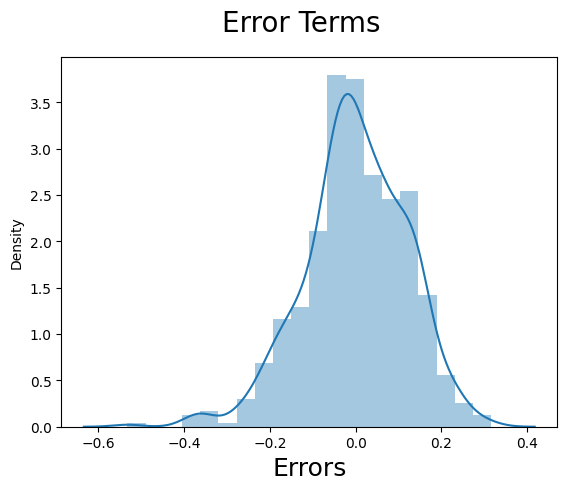

In [90]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)                         

### Making Predictions

We would first need to scale the test set as well. So let's start with that.

In [91]:
X_train_rfe2

,const,yr,holiday,workingday,temp,windspeed,weekday_Mon
98,1.0,0,0,0,0.353092,0.189757,1
396,1.0,1,0,1,0.510926,0.310919,0
175,1.0,0,0,0,0.792325,0.355294,1
454,1.0,1,0,0,0.454854,0.444127,1
234,1.0,0,0,1,0.724830,0.219363,0
...,...,...,...,...,...,...,...
132,1.0,0,0,1,0.564921,0.290701,0
289,1.0,0,0,1,0.591919,0.281295,0
109,1.0,0,0,1,0.667720,0.425316,0
480,1.0,1,0,1,0.547268,0.283992,0


In [92]:
# let's recall the set of variables which are to be scaled
var

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [93]:
df_test[var] = scaler.transform(df_test[var])

In [94]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [95]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_C,weathersit_F
333,0,0,1,0.331287,0.632030,0.488582,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0.984424,0.515242,0.185727,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
279,0,0,1,0.562844,0.705024,-0.049804,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
483,1,0,0,0.497426,0.604980,0.154750,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
267,0,0,0,0.716524,0.870760,0.010767,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [96]:
# Let's check the list 'col2' which had the 6 variables RFE had selected
col2=c.columns
col2

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'weekday_Mon'], dtype='object')

In [97]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe2 = X_test[col2]

In [98]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 333 to 432
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   const        183 non-null    float64
 1   yr           183 non-null    int64  
 2   holiday      183 non-null    int64  
 3   workingday   183 non-null    int64  
 4   temp         183 non-null    float64
 5   windspeed    183 non-null    float64
 6   weekday_Mon  183 non-null    int32  
dtypes: float64(3), int32(1), int64(3)
memory usage: 10.7 KB


In [99]:
# Making predictions
y_pred = lm3.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

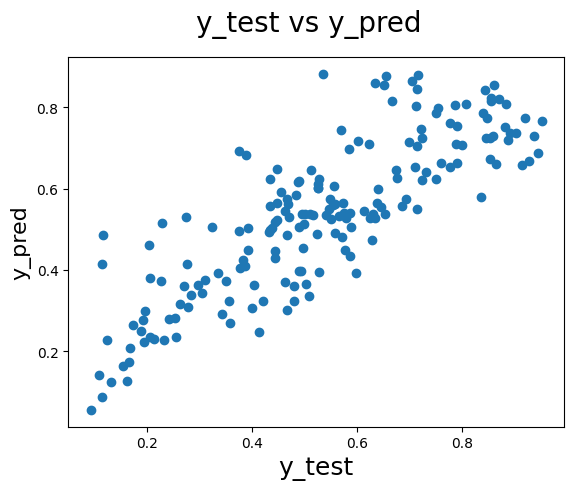

In [100]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [101]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6909081093859069

Thus, for the model with 6 variables,he adjusted r-squared on the train set is about is about 69%.

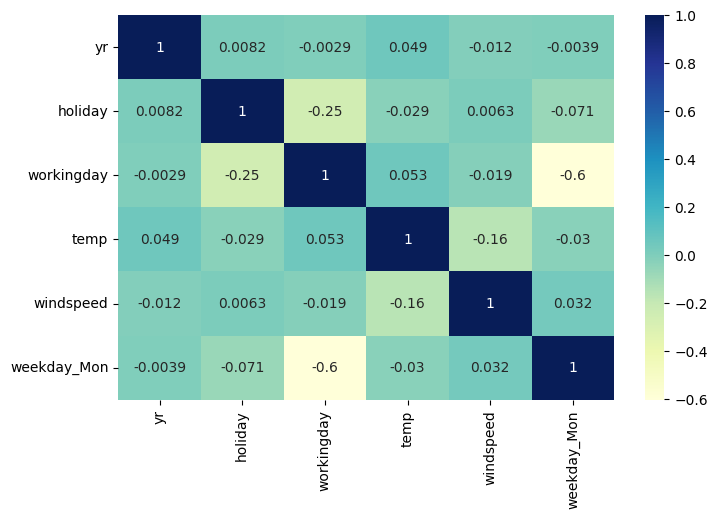

In [102]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(bike_sharing[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()

This is the simplest model that we could build. The final predictors seem to have fairly low correlations. 

Thus, the final model consists of the 6 variables mentioned above.One can go ahead with this model and use it for predicting count of daily bike rentals.



## Conclusions
- Weather conditions significantly influence bike rental demand. Specifically, clear or partly cloudy weather (represented by lower weather situation values) tends to result in higher bike rentals, while adverse weather conditions (such as rain or snow) lead to a decrease in rentals. This insight can help the company plan for increased bike availability during favorable weather conditions.
- Seasonal patterns have a noticeable impact on bike rentals. The data indicates that bike rentals are higher during the spring and summer months compared to the fall and winter. This seasonal variation suggests that promotional efforts and resource allocation can be adjusted accordingly to maximize bike usage during peak seasons.
- The time of day and day of the week are crucial factors affecting bike rental demand. The analysis reveals that bike rentals peak during morning and evening rush hours on weekdays, indicating a strong demand for bikes for commuting purposes. Conversely, weekends show a more even distribution of rentals throughout the day, suggesting a different usage pattern primarily for leisure activities.
- The presence of holidays and working days also affects bike rental patterns. There is a noticeable drop in bike rentals on holidays compared to regular working days, which can be attributed to reduced commuter demand. Understanding this trend can help in planning bike maintenance and redistribution during periods of lower demand, ensuring optimal resource utilization.